# Anacondaでopencvを使う方法 / How to use OpenCV in Anaconda


(2019改訂)
## Windowsの場合

1. [リンク先](http://www.lfd.uci.edu/%7Egohlke/pythonlibs/#opencv)から最新版のPython用OpenCVパッケージをダウンロード。おすすめは最新版OpenCV4で拡張機能も搭載した opencv_python‑4.1.0+contrib‑cp37‑cp37m‑win_amd64.whl
2. Anaconda Navigatorで左メニューのEnvironmentsを押し、baseの右側の三角を押してTerminalをひらく。
   ![](https://i.gyazo.com/6fe8b1a2a1fc47c1e459ae7e831b7efb.png)
3. 以下のコマンドを入力

       pip install <さっきダウンロードしたファイルのパス>

## Macの場合

1. Anaconda Navigatorで左メニューのEnvironmentsを押し、baseの右側の三角を押してTerminalをひらく。
   ![](https://i.gyazo.com/6fe8b1a2a1fc47c1e459ae7e831b7efb.png)
2. 以下のコマンドを入力

       pip install opencv-python opencv-contrib-python


# OpenCVでとにかく何か表示してみよう。

> OpenCV（オープンシーヴィ、英語: Open Source Computer Vision Library）とはインテルが開発・公開したオープンソースのコンピュータビジョン向けライブラリ[1]。2009年にWillow Garage（ウィロー・ガレージ）に開発が移管された後、2015年現在はItseezがメンテナンスを行なっている[2]。なお、2016年5月26日にインテルがItseezを買収することが発表された。[Wikipedia](https://en.wikipedia.org/wiki/OpenCV)

> OpenCV (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision.[2] Originally developed by Intel, it was later supported by Willow Garage and is now maintained by Itseez.[1] The library is cross-platform and free for use under the open-source BSD license. [Wikipedia](https://en.wikipedia.org/wiki/OpenCV)

たぶん今のPCならカメラを内蔵しているだろうから、カメラから直接とりこむのが一番てっとりばやい。

Almost all note PC has a camera for Skyping.  We utilize it to capture the sample image.

(Macの場合、セキュリティの確認ダイアログが表示される)

In [3]:
import sys
sys.executable

'/usr/local/anaconda3/bin/python'

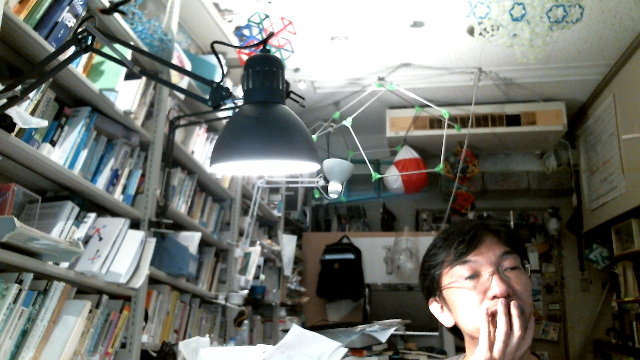

(360, 640, 3)


In [1]:
# OpenCVライブラリを読みこむ。
import cv2
# 画像操作ライブラリ
from PIL import Image 

# Device ID of the camera would be 0
# カメラのデバイス番号は0番になっていることが多い。
# デバイス番号の代わりに動画ファイルを指定することもできる。
camera = cv2.VideoCapture(0)

# Capture a frame from the camera.
# カメラから1フレーム読みこむ。retがFalseになったら読み損ねている。
ret, image = camera.read()

# 画像の大きさを640x360に縮小。(カメラによっては(640,480)の場合も)
image = cv2.resize(image, (640,360))


# Jupyterの中で表示
# 画像はnumpy arrayの形になっていて、image[行, 列, 色]
# OpenCVの色はBGR順だが通常はRGB順なので、displayする時に順番を入れかえる。
display(Image.fromarray(image[:,:,::-1]))
# 以下の例ではdisplayは使わないので気にしなくていい

# 画像のサイズを見る。
print(image.shape)
camera.release()

imageの中身に注目して下さい。整数値の三つ組がたくさんはいった,3次元のnumpy arrayになっています。
3つ組の数字はRGB(三原色)を表現していて、写真の画素一つ一つの色がすべて含まれています。
それが行ごとにまとめられ、すべての行をまとめたものが1枚の写真になります。
つまり、numpyのarrayの操作さえ知っていれば、写真を自由に操作できる、ということになります。

See the content of the `image` variable. It is a three-dimensional numpy array of integers.
The innermost triplets express the intensities of the three primitive colors, blue, green, and red, at a single pixel.
Pixels are bundled to make a row, and the rows are budled to make the whole image.
That is, if you know how to access and modify the numpy array, you can also process the image.

`row`行目のピクセルの色は、`image[row]`あるいは`image[row,:,:]`で参照できます。

Colors of the pixels at the `row` are referred to as `image[row]` or `image[row,:,:]`.

In [ ]:
image[100,:,:]

`row`行目、`col`列目のピクセルの色は、`image[row,col]`あるいは`image[row,col,:]`で参照できます。

Color of the pixel at (`row`, `col`) is referred to as `image[row,col]` or `image[row,col,:]`.

In [ ]:
image[100,200,:]

`row`行目、`col`列目のピクセルの赤色の強度は、`image[row,col,2]`で参照できます。色の順番はRGBではなくBGR(0=Blue, 1=Green, 2=Red)です。

The red strength of the pixel at (`row`, `col`) is referred to as `image[row,col,2]`. Note that color order is not RGB but BGR (blue is 0, green is 1, red is 2).

In [ ]:
image[100,200,2]

画像は`imwrite()`関数を使って保存できます。

The obtained image can be saved with `imwrite()` function.

In [ ]:
cv2.imwrite("test.jpg", image)

上の例では1枚の写真が得られるだけですが、これをくりかえせば、ムービーになります。
動画のウィンドウ上で何かキーを押せばプログラムが終わるようになっています。
画像解像度が高すぎる場合は、resize関数で小さくして下さい。

In the example above, only one image is obtained. If you repeat the process with a loop, you get a movie.
If the picture size is too large to be displayed, use `resize()` function.

In [ ]:
import cv2
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    cv2.imshow("Hello!", image)

#Close all the windows.  
cv2.destroyAllWindows()
# cv2.waitKey(1)
camera.release()

## 簡単な画像処理
色の明るさは0〜255の整数で表現されていますから、色調を完全に反転させるには、255から引きます。

カメラからとりこんだ画像を、ウィンドウに表示する前に、処理をすれば、処理後の画像を見ることができます。
もちろん、2つウィンドウをひらいて、両方見比べることも簡単です。

Color intensities are expressed by the integer number between 0 (dark) and 255 (bright). Therefore, if you want to invert the colors, subtract them from 255.

In the following sample, the original and inverted images are shown in a different window.

In [ ]:
import cv2
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    reversed_image = 255 - image #reverse the colors (numpy operation)

    cv2.imshow("Hello!", image)
    cv2.imshow("!olleH", reversed_image)  #Show the reversed image

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)


赤だけを反転するには? ここでもnumpyのarray操作が使えます。

Can we then invert the red component only?  Numpy is useful for such an operation. 

In [ ]:
import cv2
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    image2 = image.copy() #firstly make the copy of the image
    image2[:,:,2] = 255 - image2[:,:,2]  #Color order in OpenCV is not RGB but BGR.

    cv2.imshow("Hello!", image)
    cv2.imshow("!olleH", image2)  #Show the reversed image

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)

上下を入れかえたいなら、行を反転すればいいのです。

If you want to make the image upside-down, just invert the order of image rows.

In [ ]:
import cv2
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    upsidedown = image[::-1,:,:] 

    cv2.imshow("Hello!", image)
    cv2.imshow("!olleH", upsidedown)  #Show the reversed image

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)

下半分を反転して上半分にもっていくと、かっこいいビデオエフェクトになります。

In [ ]:
import cv2
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    image[0:180] = image[:179:-1]
    cv2.imshow("Hello!", image)

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)

## 宿題1
右半分を反転して左半分に表示するようにしてみましょう。

Fold the right half onto the left half of the image.

## 録画
ちなみに、録画はこんな風に書きます。(動かない可能性が高いですが)

In [ ]:
import cv2
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

# 出力先を指定
out = cv2.VideoWriter("test.avi", # file name
                      cv2.VideoWriter_fourcc(*'XVID'), # おまじない
                      10,         # frame rate
                      (640,360))  # size

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    image[0:180] = image[:179:-1]
    cv2.imshow("Hello!", image)
    # Write a frame to the video file.
    out.write(image)

#Close all the windows.
cv2.destroyAllWindows()
cv2.waitKey(1)

#Close video file
out.release()
camera.release()

カメラを何台も連結し、その画像を全部とりこんで、防犯カメラとして使うのも、ここまでの知識でできそうですね。

## 少し高度な画像処理 More tricks
瞬間瞬間の画像を加工するのではなく、時間変化をとらえてみましょう。以下の例では、直前の画像をlastimage変数に保存しておき、absdiff関数で画像の差分を作ります。

Instead of processing an instantaneous image, let us process the difference.  In the following example, the captured image is stored in `lastimage` and compare it with the new capture.

In [ ]:
import cv2
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

ret, image = camera.read()   #Obtain the first image
lastimage = cv2.resize(image, (640,360))  #and resize it.
while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    diff = cv2.absdiff(image, lastimage)
    # 明暗を反転して表示
    # Show inverted image
    cv2.imshow("Hello!", 255 - diff)
    lastimage = image

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)

爬虫類や両生類は、動いているものしか見えないと言います。たぶん彼らの見ている世界はこんな感じなのでしょう。

It is said that reptiles and amphibians only see the moving things. Perhaps they are looking the world like this.

OpenCVの関数で、輪郭抽出するCannyを使ってみましょう。これは動きを検出するわけではなく、静止画1枚から輪郭を見つけます。

In [ ]:
import cv2
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

ret, image = camera.read()   #Obtain the first image
while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    diff = cv2.Canny(image, 100, 200) #min and max
    cv2.imshow("Hello!", diff)

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)

面白いのでもっと遊んでみます。輪郭線をもとの画像に重ねてみます。世界がアニメ風になります。

In [5]:
import cv2
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

ret, image = camera.read()   #Obtain the first image
while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    diff = cv2.Canny(image, 10, 200) #min and max

    # diffの値が0でない(=白)の部分だけ、imageを0にする。
    image[diff>0] = 0  

    cv2.imshow("Hello!", image)

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)

-1

## 高度な画像処理 Advanced image processing
OpenCVは最先端の画像処理ライブラリなので、単なる画像の編集以上のことができます。私たちは画像処理の専門家ではないので、技術的な内容まではよくわかりませんが、とにかく利用することならできます。

次の例では、Background Subtractionという技術を使い、背景と動いている物体を区別して、動きがあった部分だけを切り抜きます。

https://docs.opencv.org/3.4/db/d5c/tutorial_py_bg_subtraction.html

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
# BackgroundSubtractorを作成。いつものように中身はブラックボックス
fgbg = cv2.createBackgroundSubtractorMOG2()

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    # BackgroundSubtractorに画像を渡すと、マスクを生成する。
    fgmask = fgbg.apply(image)
    cv2.imshow("Image", image)
    cv2.imshow("Mask", fgmask)

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)


マスクというのは、画像のなかで注目する部分だけを白にした、白黒画像のことです。マスクを使うと、画像を切り抜けます。

In [ ]:
import numpy as np
import cv2
from time import sleep

cap = cv2.VideoCapture(0)
# BackgroundSubtractorを作成。いつものように中身はブラックボックス
fgbg = cv2.createBackgroundSubtractorMOG2()


while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    # BackgroundSubtractorに画像を渡すと、マスクを生成する。
    fgmask = fgbg.apply(image)
    
    # fgmaskの値が0の部分だけ、画像も0にする
    image[fgmask==0] = 0
    cv2.imshow("Masked Image", image)
    # 0.1秒待たせ、わざとコマ送りにします。
    sleep(0.1)

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)



動いた部分だけを上書きしていくと?

In [ ]:
import numpy as np
import cv2
from time import sleep

cap = cv2.VideoCapture(0)
# BackgroundSubtractorを作成。いつものように中身はブラックボックス
fgbg = cv2.createBackgroundSubtractorMOG2()

# 最初のコマをfirstに入れておきます。
ret, first = camera.read()
first = cv2.resize(first, (640,360))

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    # BackgroundSubtractorに画像を渡すと、マスクを生成する。
    fgmask = fgbg.apply(image)
    
    # fgmaskの値が0でない部分だけ、imageの内容をfirstに上書きする
    first[fgmask>0] = image[fgmask>0]
    # 動いた部分だけが書き加えられます。
    # 左右は反転したほうがわかりやすい。
    cv2.imshow("Canvas", first[:, ::-1, :])
    # 0.1秒待たせ、わざとコマ送りにします。
    sleep(0.1)

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)



最近のカメラのように、映像の中に顔を見付けだす実験をやってみます。といっても、自分ではその方法が見当もつかないので、Googleに頼ります。

Googleで"OpenCV python face detection" "OpenCV python 顔認識" などのキーワードで検索すると、10行程度のコードを書くだけで顔認識してくれることがわかります。今回は、[http://qiita.com/wwacky/items/98d8be2844fa1b778323](http://qiita.com/wwacky/items/98d8be2844fa1b778323) のコードを読み、上で書いたプログラムに組み込んで、動画からリアルタイムで顔を認識するようにしてみましょう。

Since OpenCV is a state-of-the-art image processing library, it can do more than just editing images. We are not experts in image processing, so we do not know the technical content well, but we can do it anyway.

Let us try to detect the faces in the captured image like a recent digital cameras and smart phones.

Giving the keywords such as "OpenCV python face recognition" on Google, you can get the codes for face recognition.  They are only 10 lines of Python.  For this time, I read the code of [http://qiita.com/wwacky/items/98d8be2844fa1b778323] (http://qiita.com/wwacky/items/98d8be2844fa1b778323) and incorporate it into the program written above.

コードをそのままコピーするのははばかられるので、要点だけ書くと、

Essential parts of the code are following.

    #HAAR分類器の顔検出用の特徴量。顔らしさの指標。これはOpenCVのサンプルコードに付属しているものをそのまま利用。
    #Feature collection of the faces for HAAR classifier. It is contained in the sample code for OpenCV.
    cascade_path = "haarcascade_frontalface_alt.xml"

    #グレースケール変換。モノクロ画像で認識するらしい。
    #この部分はOpenCV3で書き方が変わったらしい。
    #It converts a color image into a gray image.
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #カスケード分類器の特徴量を取得する。ループの外で一回だけ実行するだけでよさそう。
    #Initializer for the feature detector.  Must be executed only once (outside the loop)
    cascade = cv2.CascadeClassifier(cascade_path)

    #物体認識（顔認識）の実行。facerectには、顔を含む領域の長方形(複数)が入る。
    #Feature detection. It returns the list of rectangles in which faces are detected.
    facerect = cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=1, minSize=(1, 1))

    #imageに長方形を描きこむ関数。
    #It draws a rectangle on the given image.
    cv2.rectangle(image, tuple(rect[0:2]),tuple(rect[0:2]+rect[2:4]), color, thickness=2)

これらを、上のコードに埋めこみます。

Let us embed them in our program.

In [ ]:
import cv2
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

#HAAR分類器の顔検出用の特徴量。顔らしさの指標。これはOpenCVのサンプルコードに付属しているものをそのまま利用。
cascade_path = "haarcascade_frontalface_alt2.xml"
#カスケード分類器の特徴量を取得する。ループの外で一回だけ実行するだけでよさそう。
cascade = cv2.CascadeClassifier(cascade_path)

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    #グレースケール変換。モノクロ画像で認識するらしい。
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #物体認識（顔認識）の実行。facerectには、顔を含む領域の長方形(複数)が入る。
    facerect = cascade.detectMultiScale(image_gray, scaleFactor=1.3, minNeighbors=2)

    for (x,y,w,h) in facerect:
        #imageに長方形を描きこむ関数。
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), thickness=2)

    cv2.imshow("Hello!", image)

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)

顔だけ重ね描きしてみます。

In [ ]:
import cv2
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

#HAAR分類器の顔検出用の特徴量。顔らしさの指標。これはOpenCVのサンプルコードに付属しているものをそのまま利用。
cascade_path = "haarcascade_frontalface_alt2.xml"
#カスケード分類器の特徴量を取得する。ループの外で一回だけ実行するだけでよさそう。
cascade = cv2.CascadeClassifier(cascade_path)

#最初の1枚。これに上書きしていく。
ret, canvas = camera.read()
canvas = cv2.resize(canvas, (640,360))

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    #グレースケール変換。モノクロ画像で認識するらしい。
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #物体認識（顔認識）の実行。facerectには、顔を含む領域の長方形(複数)が入る。
    facerect = cascade.detectMultiScale(image_gray, scaleFactor=1.3, minNeighbors=2)

    for (x,y,w,h) in facerect:
        #canvasに顔の部分だけを描きこむ.
        canvas[y:y+h, x:x+w] = image[y:y+h, x:x+w]
    cv2.imshow("Hello!", canvas)

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)

顔をモザイクにします。

In [16]:
import cv2
import numpy as np
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

#HAAR分類器の顔検出用の特徴量。顔らしさの指標。これはOpenCVのサンプルコードに付属しているものをそのまま利用。
cascade_path = "haarcascade_frontalface_alt2.xml"
#カスケード分類器の特徴量を取得する。ループの外で一回だけ実行するだけでよさそう。
cascade = cv2.CascadeClassifier(cascade_path)

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    #グレースケール変換。モノクロ画像で認識するらしい。
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #物体認識（顔認識）の実行。facerectには、顔を含む領域の長方形(複数)が入る。
    facerect = cascade.detectMultiScale(image_gray, scaleFactor=1.3, minNeighbors=2)

    for (x,y,w,h) in facerect:
        # 四角の中だけ切りだす。
        square = image[y:y+h,x:x+w]
        # 6x6 pixelに縮小する。
        small = cv2.resize(square, (6,6))
        # もとの大きさに拡大する。
        reduced = cv2.resize(small, (w,h), interpolation=cv2.INTER_NEAREST)
        # imageに戻す。
        image[y:y+h,x:x+w] = reduced

    cv2.imshow("Hello!", image)

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)

-1

あるいは、顔だけを常に画面一杯に表示させることもできます。

In [8]:
def maxcontrast(img):
    """
    https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv
    """
    #-----Converting image to LAB Color model----------------------------------- 
    lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    #-----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)

    #-----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)

    #-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl,a,b))
    cv2.imshow('limg', limg)

    #-----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return final


In [18]:
import cv2
import numpy as np
camera = cv2.VideoCapture(0)  #Device ID of the camera would be 0

#HAAR分類器の顔検出用の特徴量。顔らしさの指標。これはOpenCVのサンプルコードに付属しているものをそのまま利用。
cascade_path = "haarcascade_frontalface_alt2.xml"
#カスケード分類器の特徴量を取得する。ループの外で一回だけ実行するだけでよさそう。
cascade = cv2.CascadeClassifier(cascade_path)

while cv2.waitKey(1) < 0:
    ret, image = camera.read()
    image = cv2.resize(image, (640,360))
    #グレースケール変換。モノクロ画像で認識するらしい。
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #物体認識（顔認識）の実行。facerectには、顔を含む領域の長方形(複数)が入る。
    facerect = cascade.detectMultiScale(image_gray, scaleFactor=1.3, minNeighbors=2)

    for (x,y,w,h) in facerect:
        # 四角の中だけ切りだす。
        square = image[y:y+h,x+w-1:x-1:-1]
        #diff = cv2.Canny(square, 100, 200) #min and max
        # diffの値が0でない(=白)の部分だけ、imageを0にする。
        #square[diff>0] = 0  

        # 16x16 pixelに縮小する。
        small = cv2.resize(square, (16,16))
        # 500x500に拡大する。
        reduced = cv2.resize(small, (200,200), interpolation=cv2.INTER_NEAREST)
        cv2.imshow("Hello!", reduced)
        break

#Close all the windows.  
cv2.destroyAllWindows()
camera.release()
cv2.waitKey(1)

-1

こういうプログラムは何に使えるの? 何でしょうね。例えば、

* 顔認識は、顕微鏡写真から、細胞の核の個数を数えたりできるでしょう。その場合、特徴量ファイルを細胞核用に準備する必要はあります。
* 動きの検出は、遅い反応や、まれにしかおこらない現象を監視するのに使えます。もちろん、防犯カメラにも。

OpenCVのすべての機能はとても紹介しきれませんが、画像処理を専門としている研究者たちが、OpenCVを使って新しい画像処理方法を見付けたり、逆に新しいアルゴリズムをOpenCVに追加したりしています。OpenCVを使えれば、それらの最新の技術を自分の研究にとりこんでいけるのです。


How can we use them for our research?

* Face recognition can count the number of cell nuclei from the photomicrograph. In that case, you need to prepare the feature file for the cell nucleus.
* Motion detection can be used to monitor slow reactions or rare phenomena. Of course, also for security cameras.

Researchers who specialize in image processing use OpenCV to find a new image processing method and add new algorithms to OpenCV. With OpenCV, you can incorporate those latest technologies into your own research.

## 間にあわなかった物ども

[OpenCVの機能リスト](https://docs.opencv.org/3.0-beta/modules/refman.html)を見ると、ほかにも面白そうな機能がたくさんありますね。まだまだ修行が必要です。

* ビデオスタビライザー
* 超解像
* QRコードの認識


## 宿題2

PythonでOpenCVを使った作例をネットで検索して、Jupyter上で動くことを確認して下さい。

今回はコピペでも構いませんが、可能ならアレンジを加えて下さい。いずれの場合も出典を示して下さい。


-1